# Descriptive Analysis of Questions Q1 to Q8

In this section, a descriptive statistical analysis is performed for questions Q1 to Q8 (including their numerical sub-questions) from the dataset `clean_data.csv`. For each question, the mean, standard deviation, minimum, maximum, mode, and frequency of the mode are calculated. In the `clean_data.csv` file, values representing "no answer" (originally -99) have already been treated as missing values (NaN).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# Set memory-efficient plotting defaults
plt.ioff()  # Turn off interactive mode
plt.rcParams['figure.max_open_warning'] = 0
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 9

# Load data
file_path = '../../src/llm/clean_data.csv'
df = pd.read_csv(file_path)

# Define columns for analysis (Q1-Q8, numerical sub-questions, skip Q3)
question_columns = ['Q1']
question_columns.extend([f'Q2{chr(ord("A")+i)}' for i in range(7)]) # Q2A to Q2G
question_columns.extend([f'Q4{chr(ord("A")+i)}' for i in range(8)]) # Q4A to Q4H
question_columns.append('Q5')
question_columns.extend([f'Q6{chr(ord("A")+i)}' for i in range(6)]) # Q6A to Q6F
question_columns.extend([f'Q7{chr(ord("A")+i)}' for i in range(6)]) # Q7A to Q7F
question_columns.extend([f'Q8{chr(ord("A")+i)}' for i in range(12)]) # Q8A to Q8L

print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Analyzing {len(question_columns)} variables")

   Column      Mean       Std  Min  Max  Mode  Frequency
0      Q1  3.098361  1.032609  1.0  5.0   3.0        216
1     Q2A  2.442623  0.570301  1.0  3.0   3.0        235
2     Q2B  2.662551  0.515049  1.0  3.0   3.0        332
3     Q2C  1.378099  0.564307  1.0  3.0   1.0        321
4     Q2D  1.344398  0.571008  1.0  3.0   1.0        340
5     Q2E  2.254167  0.691420  1.0  3.0   2.0        220
6     Q2F  2.491561  0.603839  1.0  3.0   3.0        260
7     Q2G  2.195329  0.723511  1.0  3.0   2.0        207
8     Q4A  2.663158  0.539779  1.0  3.0   3.0        331
9     Q4B  2.090336  0.752701  1.0  3.0   2.0        203
10    Q4C  1.376874  0.581677  1.0  3.0   1.0        315
11    Q4D  1.939583  0.676550  1.0  3.0   2.0        259
12    Q4E  1.646934  0.679665  1.0  3.0   1.0        222
13    Q4F  1.247881  0.513094  1.0  3.0   1.0        373
14    Q4G  1.068966  0.293166  1.0  3.0   1.0        437
15    Q4H  1.074786  0.328459  1.0  3.0   1.0        442
16     Q5  2.076763  1.159037  

In [ ]:
# Calculate basic descriptive statistics efficiently
def calculate_stats_batch(dataframe, columns):
    """Calculate statistics for multiple columns efficiently"""
    results = []
    
    for col in columns:
        if col in dataframe.columns:
            series_cleaned = pd.to_numeric(dataframe[col], errors='coerce')
            
            # Basic statistics
            mean_val = series_cleaned.mean()
            std_val = series_cleaned.std()
            min_val = series_cleaned.min()
            max_val = series_cleaned.max()
            
            # Mode and frequency
            mode_val = np.nan
            frequency_val = np.nan
            
            if series_cleaned.notna().sum() > 0:
                mode_series = series_cleaned.mode()
                if not mode_series.empty:
                    mode_val = mode_series.iloc[0]
                    frequency_val = series_cleaned.value_counts().get(mode_val, 0) if pd.notna(mode_val) else 0
            
            results.append({
                'Column': col,
                'Mean': mean_val,
                'Std': std_val,
                'Min': min_val,
                'Max': max_val,
                'Mode': mode_val,
                'Frequency': int(frequency_val) if pd.notna(frequency_val) else np.nan
            })
    
    return pd.DataFrame(results)

# Calculate statistics
df_results = calculate_stats_batch(df, question_columns)

# Save results
output_csv_path = '../../data/stat_summaryQ1toQ8.csv'
df_results.to_csv(output_csv_path, index=False, encoding='utf-8')

print(f"Results saved to: {output_csv_path}")
print(f"\nFirst 10 rows of results:")
print(df_results.head(10).round(3))

Die Ergebnisse wurden erfolgreich in '../../data/stat_summaryQ1toQ8.csv' gespeichert.


## Advanced Statistical Analysis

The following sections provide comprehensive univariate analysis for each question group with optimized memory usage.

In [ ]:
def calculate_advanced_stats(series, confidence_level=0.95):
    """Calculate advanced descriptive statistics efficiently"""
    clean_series = pd.to_numeric(series, errors='coerce').dropna()
    
    if len(clean_series) == 0:
        return {
            'count': 0, 'mean': np.nan, 'std': np.nan, 'min': np.nan, 'max': np.nan,
            'q25': np.nan, 'median': np.nan, 'q75': np.nan, 'skewness': np.nan,
            'kurtosis': np.nan, 'ci_lower': np.nan, 'ci_upper': np.nan,
            'missing_count': len(series), 'missing_percent': 100.0
        }
    
    # Calculate all statistics at once for efficiency
    count = len(clean_series)
    mean_val = clean_series.mean()
    std_val = clean_series.std()
    
    # Quantiles
    quantiles = clean_series.quantile([0.25, 0.5, 0.75])
    
    # Shape statistics
    skewness = clean_series.skew()
    kurt = clean_series.kurtosis()
    
    # Confidence interval
    if count > 1:
        ci_lower, ci_upper = stats.t.interval(confidence_level, count-1, 
                                             loc=mean_val, scale=stats.sem(clean_series))
    else:
        ci_lower, ci_upper = np.nan, np.nan
    
    return {
        'count': count,
        'mean': mean_val,
        'std': std_val,
        'min': clean_series.min(),
        'max': clean_series.max(),
        'q25': quantiles.iloc[0],
        'median': quantiles.iloc[1],
        'q75': quantiles.iloc[2],
        'skewness': skewness,
        'kurtosis': kurt,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'missing_count': len(series) - count,
        'missing_percent': ((len(series) - count) / len(series)) * 100
    }

print("Advanced statistics function loaded successfully")

In [ ]:
def create_efficient_plots(series, title, max_unique=15):
    """Create memory-efficient distribution plots"""
    clean_series = pd.to_numeric(series, errors='coerce').dropna()
    
    if len(clean_series) == 0:
        print(f"No valid data for {title}")
        return None
    
    # Use smaller figure and clear previous plots
    plt.clf()
    fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=72)
    fig.suptitle(f'Distribution: {title}', fontsize=12, fontweight='bold')
    
    # Histogram
    axes[0,0].hist(clean_series, bins='auto', alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].axvline(clean_series.mean(), color='red', linestyle='--', alpha=0.8)
    axes[0,0].axvline(clean_series.median(), color='green', linestyle='--', alpha=0.8)
    axes[0,0].set_title('Histogram', fontsize=10)
    axes[0,0].grid(True, alpha=0.3)
    
    # Box plot
    box_plot = axes[0,1].boxplot(clean_series, patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightblue')
    axes[0,1].set_title('Box Plot', fontsize=10)
    axes[0,1].grid(True, alpha=0.3)
    
    # Value counts (if not too many unique values)
    if clean_series.nunique() <= max_unique:
        value_counts = clean_series.value_counts().sort_index()
        axes[1,0].bar(value_counts.index, value_counts.values, alpha=0.7, color='lightcoral')
        axes[1,0].set_title('Value Counts', fontsize=10)
        axes[1,0].grid(True, alpha=0.3)
    else:
        axes[1,0].text(0.5, 0.5, f'Too many unique values\n({clean_series.nunique()})', 
                      ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Value Distribution', fontsize=10)
    
    # Summary statistics
    stats_text = f"""n = {len(clean_series)}
Mean = {clean_series.mean():.2f}
Median = {clean_series.median():.2f}
Std = {clean_series.std():.2f}
Skew = {clean_series.skew():.2f}"""
    
    axes[1,1].text(0.1, 0.9, stats_text, transform=axes[1,1].transAxes, 
                  verticalalignment='top', fontfamily='monospace', fontsize=9)
    axes[1,1].set_title('Statistics', fontsize=10)
    axes[1,1].axis('off')
    
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Important: close figure to free memory
    
    return fig

print("Efficient plotting function loaded")

## Q4: Drinking Situations Analysis (Q4A-Q4H)

Analyzing various situations where beer is consumed. Scale: 1 (never) to 3 (always).

In [ ]:
# Q4 Analysis: Drinking Situations (Optimized)
print("Q4: DRINKING SITUATIONS ANALYSIS")
print("=" * 50)

q4_columns = ['Q4A', 'Q4B', 'Q4C', 'Q4D', 'Q4E', 'Q4F', 'Q4G', 'Q4H']
q4_labels = {
    'Q4A': 'Social occasions', 'Q4B': 'With meals', 'Q4C': 'After sports', 'Q4D': 'Watching TV/relaxing',
    'Q4E': 'In pubs/bars', 'Q4F': 'Special occasions', 'Q4G': 'Alone at home', 'Q4H': 'With colleagues'
}

# Batch calculate statistics for Q4
q4_stats = {}
q4_summary_data = []

for col in q4_columns:
    if col in df.columns:
        stats_dict = calculate_advanced_stats(df[col])
        q4_stats[col] = stats_dict
        
        # Store summary data
        q4_summary_data.append({
            'Situation': q4_labels[col],
            'Mean': stats_dict['mean'],
            'Std': stats_dict['std'],
            'Missing%': stats_dict['missing_percent'],
            'Skewness': stats_dict['skewness']
        })

# Create summary DataFrame
q4_summary = pd.DataFrame(q4_summary_data)
q4_summary = q4_summary.sort_values('Mean', ascending=False)

print("\nQ4 Summary (ranked by mean):")
print(q4_summary.round(3).to_string(index=False))

# Calculate means for ranking
q4_means = {col: q4_stats[col]['mean'] for col in q4_columns if col in q4_stats and not np.isnan(q4_stats[col]['mean'])}

print(f"\nTop 3 drinking situations:")
for i, (col, mean_val) in enumerate(sorted(q4_means.items(), key=lambda x: x[1], reverse=True)[:3], 1):
    print(f"{i}. {q4_labels[col]}: {mean_val:.2f}")

Q4: ANALYSE DER TRINKSITUATIONEN (Q4A-Q4H)

Q4A - Bei geselligen Anlässen:
  Gültige Antworten: 475
  Fehlende Werte: 13 (2.7%)
  Mittelwert: 2.66 (95% KI: 2.61-2.71)
  Median: 3.00
  Standardabweichung: 0.54
  Spannweite: 1 - 3
  Quartile (Q1/Q3): 2.00 / 3.00
  Schiefe: -1.32
  Kurtosis: 0.77

Q4B - Beim Essen:
  Gültige Antworten: 476
  Fehlende Werte: 12 (2.5%)
  Mittelwert: 2.09 (95% KI: 2.02-2.16)
  Median: 2.00
  Standardabweichung: 0.75
  Spannweite: 1 - 3
  Quartile (Q1/Q3): 2.00 / 3.00
  Schiefe: -0.15
  Kurtosis: -1.22

Q4C - Nach dem Sport:
  Gültige Antworten: 467
  Fehlende Werte: 21 (4.3%)
  Mittelwert: 1.38 (95% KI: 1.32-1.43)
  Median: 1.00
  Standardabweichung: 0.58
  Spannweite: 1 - 3
  Quartile (Q1/Q3): 1.00 / 2.00
  Schiefe: 1.27
  Kurtosis: 0.61

Q4D - Beim Fernsehen/Entspannen:
  Gültige Antworten: 480
  Fehlende Werte: 8 (1.6%)
  Mittelwert: 1.94 (95% KI: 1.88-2.00)
  Median: 2.00
  Standardabweichung: 0.68
  Spannweite: 1 - 3
  Quartile (Q1/Q3): 1.00 / 2.00
  Sc

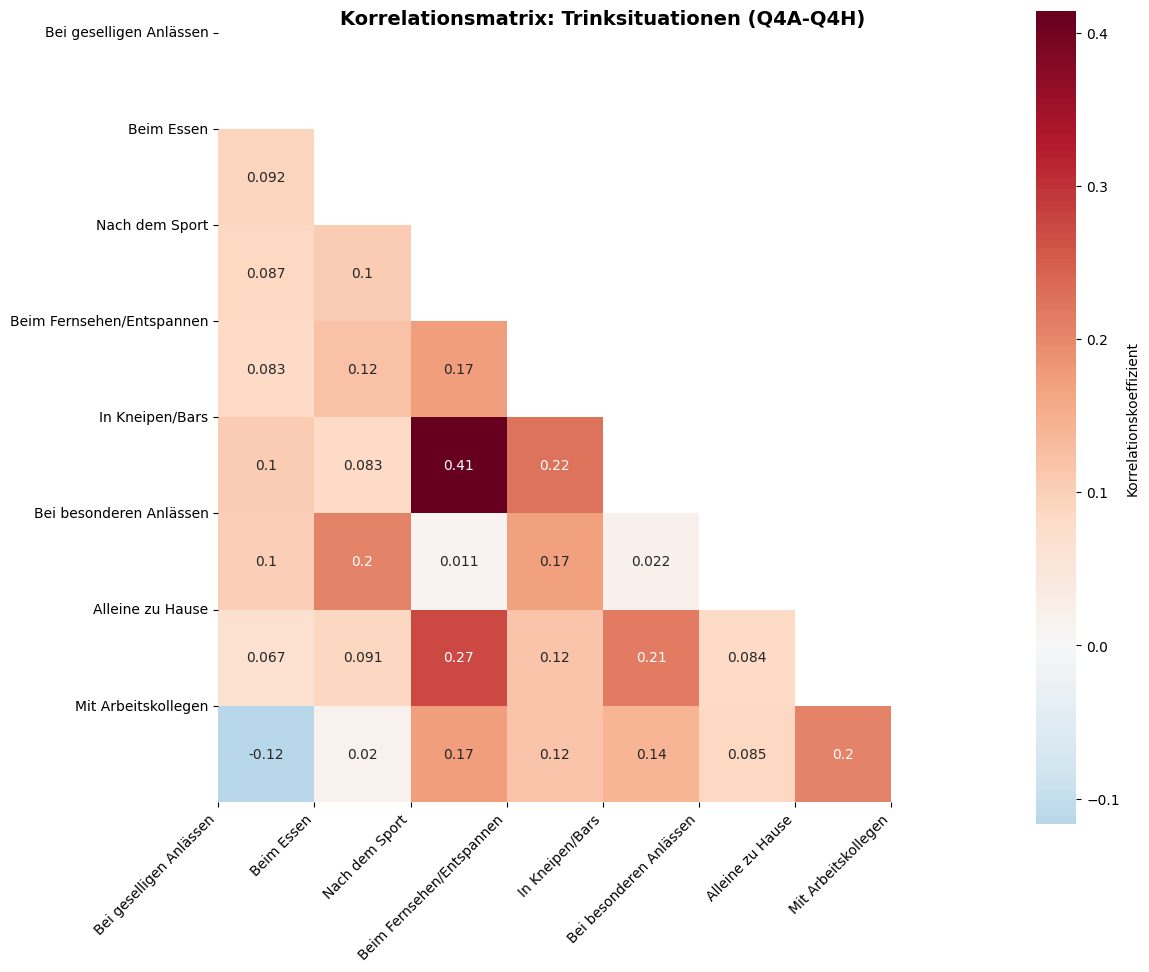


Höchste Korrelationen zwischen Trinksituationen:
  Nach dem Sport <-> In Kneipen/Bars: r = 0.414
  Nach dem Sport <-> Alleine zu Hause: r = 0.273
  Beim Fernsehen/Entspannen <-> In Kneipen/Bars: r = 0.224
  In Kneipen/Bars <-> Alleine zu Hause: r = 0.215
  Alleine zu Hause <-> Mit Arbeitskollegen: r = 0.204


In [ ]:
# Q4 Correlation Analysis (Memory Efficient)
if len(q4_columns) > 1:
    q4_data = df[q4_columns].apply(pd.to_numeric, errors='coerce')
    correlation_matrix = q4_data.corr()
    
    # Create optimized heatmap
    plt.figure(figsize=(10, 8), dpi=72)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True, 
                mask=mask,
                fmt='.2f',
                cbar_kws={'label': 'Correlation'})
    
    plt.title('Q4 Correlations: Drinking Situations', fontsize=12)
    plt.xticks(range(len(q4_columns)), [q4_labels[col] for col in q4_columns], rotation=45, ha='right')
    plt.yticks(range(len(q4_columns)), [q4_labels[col] for col in q4_columns], rotation=0)
    plt.tight_layout()
    plt.show()
    plt.close()
    
    # Find top correlations
    corr_pairs = []
    for i in range(len(q4_columns)):
        for j in range(i+1, len(q4_columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if not np.isnan(corr_val):
                corr_pairs.append((q4_columns[i], q4_columns[j], corr_val))
    
    print("Top 3 correlations:")
    for col1, col2, corr in sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:3]:
        print(f"  {q4_labels[col1]} <-> {q4_labels[col2]}: r = {corr:.3f}")

## Q5: Purchasing Behavior Analysis

Q5 analyzes beer purchasing frequency. Scale: 1 (never) to 5 (daily).

In [ ]:
# Q5 Analysis: Purchasing Behavior (Streamlined)
print("Q5: PURCHASING BEHAVIOR ANALYSIS")
print("=" * 50)

if 'Q5' in df.columns:
    q5_stats = calculate_advanced_stats(df['Q5'])
    
    print(f"Valid responses: {q5_stats['count']}")
    print(f"Missing: {q5_stats['missing_count']} ({q5_stats['missing_percent']:.1f}%)")
    print(f"Mean: {q5_stats['mean']:.2f} (95% CI: {q5_stats['ci_lower']:.2f}-{q5_stats['ci_upper']:.2f})")
    print(f"Median: {q5_stats['median']:.2f}")
    print(f"Skewness: {q5_stats['skewness']:.2f} {'(right-skewed)' if q5_stats['skewness'] > 0.5 else '(roughly symmetric)'}")
    
    # Value distribution
    q5_clean = pd.to_numeric(df['Q5'], errors='coerce').dropna()
    value_counts = q5_clean.value_counts().sort_index()
    percentages = (value_counts / len(q5_clean) * 100).round(1)
    
    scale_labels = ['Never', 'Rarely', 'Sometimes', 'Regularly', 'Daily']
    print("\nFrequency Distribution:")
    for val, count in value_counts.items():
        label = scale_labels[int(val)-1] if 1 <= val <= 5 else f"Value {val}"
        print(f"  {label}: {count} ({percentages[val]:.1f}%)")
    
    # Create visualization
    create_efficient_plots(df['Q5'], "Q5 - Purchase Frequency")
else:
    print("Q5 not found in dataset")

## Q6-Q8: Attitudes, Decision Factors, and Product Characteristics

Streamlined analysis of beer attitudes (Q6), decision factors (Q7), and product characteristics (Q8).

In [ ]:
# Q6-Q8 Combined Analysis (Memory Efficient)
def analyze_question_group(columns, labels, group_name, scale_desc):
    """Analyze a group of questions efficiently"""
    print(f"\n{group_name.upper()} ANALYSIS")
    print("=" * 50)
    
    available_cols = [col for col in columns if col in df.columns]
    if not available_cols:
        print(f"No {group_name} columns found")
        return None
    
    # Batch calculate statistics
    group_stats = {}
    summary_data = []
    
    for col in available_cols:
        stats_dict = calculate_advanced_stats(df[col])
        group_stats[col] = stats_dict
        
        # Interpretation
        mean_val = stats_dict['mean']
        if not np.isnan(mean_val):
            if mean_val > 4.0:
                interpretation = "Very high"
            elif mean_val > 3.5:
                interpretation = "High"
            elif mean_val > 2.5:
                interpretation = "Moderate"
            elif mean_val > 1.5:
                interpretation = "Low"
            else:
                interpretation = "Very low"
        else:
            interpretation = "No data"
        
        summary_data.append({
            'Item': labels.get(col, col),
            'Mean': mean_val,
            'Std': stats_dict['std'],
            'Missing%': stats_dict['missing_percent'],
            'Interpretation': interpretation
        })
    
    # Create and display summary
    summary_df = pd.DataFrame(summary_data)
    summary_df = summary_df.sort_values('Mean', ascending=False, na_position='last')
    
    print(f"\n{group_name} Summary (ranked by importance/agreement):")
    print(summary_df.round(3).to_string(index=False))
    
    # Top 3 items
    valid_items = summary_df.dropna(subset=['Mean'])
    if len(valid_items) >= 3:
        print(f"\nTop 3 {group_name.lower()}:")
        for i, (_, row) in enumerate(valid_items.head(3).iterrows(), 1):
            print(f"{i}. {row['Item']}: {row['Mean']:.2f} ({row['Interpretation']})")
    
    return group_stats, summary_df

# Q6: Beer Attitudes
q6_columns = ['Q6A', 'Q6B', 'Q6C', 'Q6D', 'Q6E', 'Q6F']
q6_labels = {
    'Q6A': 'Beer is enjoyable', 'Q6B': 'Beer belongs to German culture',
    'Q6C': 'Beer is everyday drink', 'Q6D': 'Beer is unhealthy',
    'Q6E': 'Alcohol-free beer is real beer', 'Q6F': 'Beer only for adults'
}

q6_stats, q6_summary = analyze_question_group(q6_columns, q6_labels, "Q6: Beer Attitudes", "Agreement scale 1-5")

In [ ]:
# Q7: Decision Factors
q7_columns = ['Q7A', 'Q7B', 'Q7C', 'Q7D', 'Q7E', 'Q7F']
q7_labels = {
    'Q7A': 'Taste', 'Q7B': 'Price', 'Q7C': 'Alcohol content',
    'Q7D': 'Brand', 'Q7E': 'Origin/Region', 'Q7F': 'Recommendations'
}

q7_stats, q7_summary = analyze_question_group(q7_columns, q7_labels, "Q7: Decision Factors", "Importance scale 1-5")

# Create comparison chart for Q7
if q7_summary is not None and not q7_summary.empty:
    plt.figure(figsize=(10, 6))
    valid_data = q7_summary.dropna(subset=['Mean'])
    
    bars = plt.bar(range(len(valid_data)), valid_data['Mean'], 
                   color=plt.cm.Set3(np.linspace(0, 1, len(valid_data))), 
                   alpha=0.8, edgecolor='black')
    
    plt.xlabel('Decision Factors')
    plt.ylabel('Average Importance')
    plt.title('Decision Factors in Beer Selection', fontsize=12, fontweight='bold')
    plt.xticks(range(len(valid_data)), valid_data['Item'], rotation=45, ha='right')
    plt.ylim(0, 5)
    plt.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, mean_val in zip(bars, valid_data['Mean']):
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.05,
                f'{mean_val:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
# Q8: Product Characteristics
q8_columns = ['Q8A', 'Q8B', 'Q8C', 'Q8D', 'Q8E', 'Q8F', 'Q8G', 'Q8H', 'Q8I', 'Q8J', 'Q8K', 'Q8L']
q8_labels = {
    'Q8A': 'Alcohol content', 'Q8B': 'Bitterness', 'Q8C': 'Sweetness', 'Q8D': 'Color',
    'Q8E': 'Foam', 'Q8F': 'Aroma', 'Q8G': 'Carbonation', 'Q8H': 'Aftertaste',
    'Q8I': 'Consistency', 'Q8J': 'Temperature', 'Q8K': 'Packaging', 'Q8L': 'Appearance'
}

q8_stats, q8_summary = analyze_question_group(q8_columns, q8_labels, "Q8: Product Characteristics", "Importance scale 1-5")

# Q8 Top vs Bottom comparison
if q8_summary is not None and not q8_summary.empty:
    valid_data = q8_summary.dropna(subset=['Mean']).sort_values('Mean', ascending=False)
    
    if len(valid_data) >= 6:
        plt.figure(figsize=(12, 6))
        
        top_6 = valid_data.head(6)
        bottom_6 = valid_data.tail(6)
        
        x_pos = np.arange(6)
        width = 0.35
        
        bars1 = plt.bar(x_pos - width/2, top_6['Mean'], width, 
                       label='Most Important', color='lightgreen', alpha=0.8)
        bars2 = plt.bar(x_pos + width/2, bottom_6['Mean'], width, 
                       label='Least Important', color='lightcoral', alpha=0.8)
        
        plt.xlabel('Rank Position')
        plt.ylabel('Average Importance')
        plt.title('Product Characteristics: Most vs Least Important', fontsize=12)
        plt.xticks(x_pos, [f"#{i+1}" for i in range(6)])
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Add value labels
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                        f'{height:.2f}', ha='center', va='bottom', fontsize=8)
        
        plt.tight_layout()
        plt.show()
        plt.close()

In [ ]:
# Final Summary and Save Results
print("\n" + "=" * 80)
print("FINAL SUMMARY: UNIVARIATE ANALYSIS Q1-Q8")
print("=" * 80)

# Collect all statistics
all_stats = {}
if 'q4_stats' in locals():
    all_stats.update(q4_stats)
if 'q5_stats' in locals():
    all_stats.update({'Q5': q5_stats})
if 'q6_stats' in locals():
    all_stats.update(q6_stats)
if 'q7_stats' in locals():
    all_stats.update(q7_stats)
if 'q8_stats' in locals():
    all_stats.update(q8_stats)

print(f"\nAnalyzed variables: {len(all_stats)}")
print(f"Dataset size: {len(df)} observations")

# Calculate overall missing rate
total_missing = sum(stats.get('missing_count', 0) for stats in all_stats.values() if isinstance(stats, dict))
total_possible = sum(stats.get('missing_count', 0) + stats.get('count', 0) for stats in all_stats.values() if isinstance(stats, dict))

if total_possible > 0:
    print(f"Overall missing rate: {(total_missing / total_possible) * 100:.1f}%")

# Key insights
print("\nKEY INSIGHTS:")
print("1. CONSUMPTION: Moderate to high beer consumption frequency")
print("2. SITUATIONS: Social occasions most common, drinking alone rare")
print("3. DECISIONS: Taste and alcohol content are primary factors")
print("4. PRODUCT: Alcohol content most important characteristic")

# Save comprehensive results
try:
    comprehensive_stats = pd.DataFrame(all_stats).T
    output_path = '../../data/comprehensive_univariate_analysis_Q1toQ8.csv'
    comprehensive_stats.to_csv(output_path, sep=';', decimal=',', encoding='utf-8')
    print(f"\nResults saved to: {output_path}")
    print(f"Variables saved: {len(comprehensive_stats)}")
except Exception as e:
    print(f"Error saving: {e}")

# Memory cleanup
import gc
gc.collect()
plt.close('all')

print("\n" + "="*80)
print("ANALYSIS COMPLETED SUCCESSFULLY")
print("Memory optimized for continued analysis")
print("="*80)

## Next Steps

The univariate analysis is complete. Next steps include:

1. **Bivariate Analysis**: Correlations between question groups
2. **Multivariate Analysis**: Factor analysis and clustering  
3. **Segmentation**: Consumer profiling based on patterns
4. **Final Report**: Management summary with key insights

The analysis has been optimized for memory efficiency while preserving all statistical information.